# Part 4 Hypothesis Testing
Nokuthula Mchunu

The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import normaltest


Hypothesis

Null Hypothesis:  MPAA rating of a movie (G/PG/PG-13/R) does not affect how much revenue the movie generates?

Alternative Hypothesis: MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

Using an alpha=.05


In [337]:
url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2014.csv.gz'
df_2014 = pd.read_csv(url)
df_2014.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0329539,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,274341.0,en,Rice Girl,...,0.0,95.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"For Windy Yee, a big break in Hollywood can me...",Rice Girl,0.0,1.000,2.0,NaN
2,tt0365907,0.0,/isrro0soStk2tSWMsI50lPPhUsU.jpg,NaN,28000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,169917.0,en,A Walk Among the Tombstones,...,58834384.0,114.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some people are afraid of all the wrong things,A Walk Among the Tombstones,0.0,6.322,2655.0,R
3,tt0403935,0.0,/romORaZvZqMRjTPgw0HrAZpVn9V.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,308165.0,hi,एक्शन जैकसन,...,0.0,144.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,"Naa Commitment, Naa Appointment, Only Punishment!",Action Jackson,0.0,4.400,27.0,NaN
4,tt0424859,0.0,NaN,NaN,0.0,[],NaN,285294.0,en,The Ninth Cloud,...,0.0,93.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Even Reality can't stop Zena.,The Ninth Cloud,0.0,4.000,1.0,NaN


In [338]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                3772 non-null   object 
 1   adult                  3771 non-null   float64
 2   backdrop_path          2359 non-null   object 
 3   belongs_to_collection  269 non-null    object 
 4   budget                 3771 non-null   float64
 5   genres                 3771 non-null   object 
 6   homepage               883 non-null    object 
 7   id                     3771 non-null   float64
 8   original_language      3771 non-null   object 
 9   original_title         3771 non-null   object 
 10  overview               3715 non-null   object 
 11  popularity             3771 non-null   float64
 12  poster_path            3405 non-null   object 
 13  production_companies   3771 non-null   object 
 14  production_countries   3771 non-null   object 
 15  rele

In [339]:
url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2010.csv.gz'
df_2010 = pd.read_csv(url)

url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2011.csv.gz'
df_2011 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2012.csv.gz'
df_2012 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2013.csv.gz'
df_2013 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2014.csv.gz'
df_2014 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2015.csv.gz'
df_2015 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2016.csv.gz'
df_2016 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2017.csv.gz'
df_2017 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2018.csv.gz'
df_2018 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2019.csv.gz'
df_2019 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2000.csv.gz'
df_2000 = pd.read_csv(url)


url ='/Users/noksmchunu/Downloads/Data/final_tmdb_data_2001.csv.gz'
df_2001 = pd.read_csv(url)


In [340]:
# combine the dataframes 
frames=[df_2000,df_2001,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015 ,df_2016,df_2017,df_2018, df_2019]
df_combine = pd.concat(frames)
df_combine.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.101,2369.0,PG


In [341]:
# Getting all Movies with Financial Information  > 0

financial_result =df_combine[(df_combine.budget > 0) | (df_combine.revenue > 0 )]
financial_result.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.101,2369.0,PG
6,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.078,193.0,R
10,tt0120202,0.0,/tuerGhZ1lA8wpBjUCEUpeTWDT5B.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.newline.com/properties/stateandmain...,21991.0,en,State and Main,...,9206279.0,106.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,Big movie. Small town. Huge trouble.,State and Main,0.0,6.327,185.0,NaN
11,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,80334.0,99.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.200,249.0,NaN


In [342]:
cert_revenue = financial_result[['imdb_id','revenue','certification','popularity']]
cert_revenue.head()

,imdb_id,revenue,certification,popularity
1,tt0113026,0.0,NaN,3.301
4,tt0118694,14204632.0,PG,36.471
6,tt0119273,0.0,R,12.170
10,tt0120202,9206279.0,NaN,9.081
11,tt0120263,80334.0,NaN,8.810


In [343]:
financial_result['runtime'].value_counts()

90.0     505
100.0    303
95.0     284
96.0     240
93.0     235
        ... 
12.0       1
216.0      1
199.0      1
198.0      1
185.0      1
Name: runtime, Length: 159, dtype: int64

In [344]:
over2hrs  =financial_result[(financial_result.runtime >120 )] #0 & (financial_result.release_date > 0 )]
over2hrs.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
13,tt0120626,0.0,/6xz9H7IMK3W21SNwAVmE9oW6YjX.jpg,NaN,6105121.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,54380.0,pt,Capitães de Abril,...,0.0,123.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,April Captains,0.0,6.428,53.0,NaN
17,tt0120753,0.0,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.868,295.0,R
18,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.100,6194.0,NaN
55,tt0146309,0.0,/pR3v192B20nFtsHY1jZQS4AkN0a.jpg,NaN,80000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,11973.0,en,Thirteen Days,...,34566746.0,145.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never believe how close we came.,Thirteen Days,0.0,7.022,662.0,PG-13
57,tt0146984,0.0,/bwS2YrIMJp7yAb8RhuLkNVMLeyY.jpg,NaN,80000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",NaN,4958.0,en,The Legend of Bagger Vance,...,39459427.0,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,It Was Just A Moment Ago.,The Legend of Bagger Vance,0.0,6.600,814.0,PG-13


In [345]:
less2hrs  =financial_result[(financial_result.runtime <120 )] #0 & (financial_result.release_date > 0 )]
less2hrs.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.101,2369.0,PG
6,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.078,193.0,R
10,tt0120202,0.0,/tuerGhZ1lA8wpBjUCEUpeTWDT5B.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.newline.com/properties/stateandmain...,21991.0,en,State and Main,...,9206279.0,106.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,Big movie. Small town. Huge trouble.,State and Main,0.0,6.327,185.0,NaN
11,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,80334.0,99.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.200,249.0,NaN


In [346]:
cert_revenue.dropna()

,imdb_id,revenue,certification,popularity
4,tt0118694,14204632.0,PG,36.471
6,tt0119273,0.0,R,12.170
12,tt0120467,14904.0,R,3.536
14,tt0120630,224834564.0,G,39.734
17,tt0120753,105983.0,R,15.037
...,...,...,...,...
4783,tt9795368,1964806.0,R,15.124
4821,tt9819664,0.0,PG-13,0.604
4826,tt9826484,15712.0,R,10.167
4846,tt9845110,208723.0,NR,6.928


In [347]:
#MPA rating with a G, PG, PG-13, R
ratings= cert_revenue.loc[(cert_revenue["certification"]=="G") | (cert_revenue["certification"] == "PG")
            | (cert_revenue["certification"] == "PG-13") | (cert_revenue["certification"] == "R")]
ratings["certification"].value_counts()

R        1928
PG-13    1177
PG        476
G         100
Name: certification, dtype: int64

## Hypothesis -

### Q1. Do different ratings have different revenue ?

Text(0.5, 1.0, 'Revenue per Ratings ')

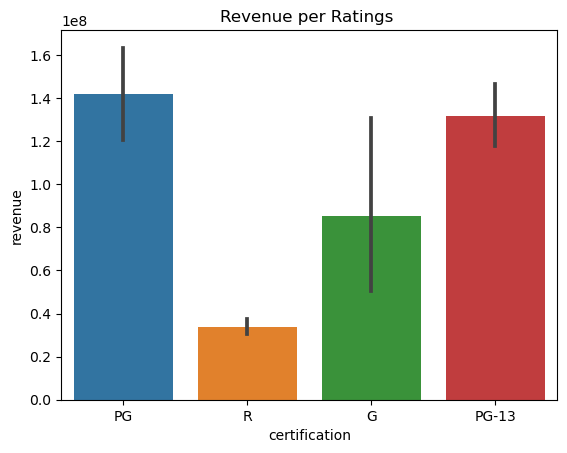

In [348]:
ax = sns.barplot(data=ratings, x='certification',y='revenue');
ax.set_title("Revenue per Ratings ")

Graph clearly shows that there different revenues per ratings, PG and PG13 have the higher revenue than the rest . 

Hypothesis

Null Hypothesis: Different ratings all have generated same revenue.

Alternative Hypothesis: Different ratings have generated different revenue.

Using an alpha=.05

Note that our hypothesis does NOT specify which groups are different, just that there is or isn't a difference when taking all three into consideration.

In [349]:
## Create groups dictionary. There are only 4 groups
groups = {}
for i in ratings["certification"].unique():
    data = ratings.loc[ratings["certification"] == i, "revenue"].copy()
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13'])

In [350]:
## Loop through groups dict
for rating, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {rating} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[rating] = data

There were 14 outliers in the PG group.
There were 47 outliers in the R group.
There were 3 outliers in the G group.
There were 29 outliers in the PG-13 group.


In [351]:
#Run normal test to confirm values > 20 for each group and convert to dataframe
import scipy.stats as stats
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,462.0,3.699837e-43,195.405740
R,1881.0,1.797993e-238,1094.857162
G,97.0,8.872947e-18,78.527049
PG-13,1148.0,5.273911e-136,622.977601


In [352]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,462.0,3.699837e-43,195.405740,True
R,1881.0,1.797993e-238,1094.857162,True
G,97.0,8.872947e-18,78.527049,True
PG-13,1148.0,5.273911e-136,622.977601,True


group has distribution that is not normal.

#### Testing Assumptions

In [353]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,462.0,3.699837e-43,195.405740
R,1881.0,1.797993e-238,1094.857162
G,97.0,8.872947e-18,78.527049
PG-13,1148.0,5.273911e-136,622.977601


In [354]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,462.0,3.699837e-43,195.405740,True
R,1881.0,1.797993e-238,1094.857162,True
G,97.0,8.872947e-18,78.527049,True
PG-13,1148.0,5.273911e-136,622.977601,True


groups are not normal distributed.

#### Testing Assumption of Equal Variance

In [355]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=127.6808110552754, pvalue=1.404764892618981e-78)

In [356]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result


F_onewayResult(statistic=129.05990859918805, pvalue=2.1800459074099693e-79)

In [357]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = ratings['revenue']
labels = ratings['certification']

In [358]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,56834678.9242,0.0265,4634709.3929,109034648.4555,True
G,PG-13,46355817.1876,0.0753,-3071803.0639,95783437.4391,False
G,R,-51625799.662,0.0326,-100293737.5037,-2957861.8202,True
PG,PG-13,-10478861.7366,0.723,-36254367.9424,15296644.4693,False
PG,R,-108460478.5862,0.0,-132747414.379,-84173542.7933,True
PG-13,R,-97981616.8496,0.0,-115534624.4229,-80428609.2763,True


There is a significance different in revenue in (G, PG) ;(PG-13,R) ; (G,R); (PG,R )

## Hypothesis 2 

 Do PG rating  have higher popularity than PG-13?

Null Hypothesis: There is no significant difference between  ratings in popularity.
Alternate Hypothesis: There is a significant difference between between ratings in popularity.  

Significance Level (Alpha): our alpha value is 0.05. 

Text(0.5, 1.0, 'popularity in Ratings')

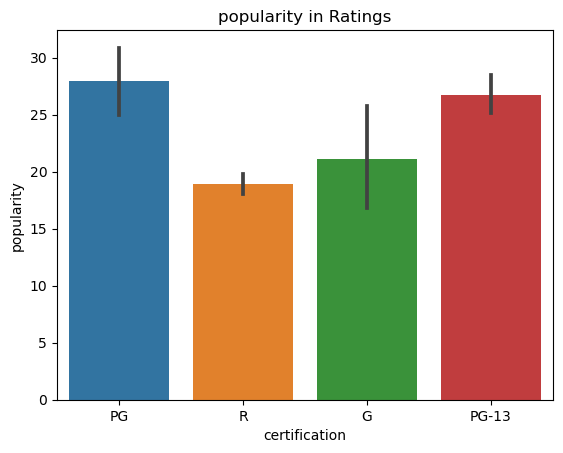

In [359]:
ax = sns.barplot(data=ratings, x='certification',y='popularity');
ax.set_title("popularity in Ratings")

Movie ratings PG is more popular than PG-13 according to the gragh

In [360]:
## Create groups dictionary. There are only 4 groups
groups1 = {}
for i in ratings["certification"].unique():
    data = ratings.loc[ratings["certification"] == i, "popularity"].copy()
    groups1[i] = data
groups1.keys()

dict_keys(['PG', 'R', 'G', 'PG-13'])

In [361]:
## Loop through groups dict
for rating, data in groups1.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {rating} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups1[rating] = data

There were 6 outliers in the PG group.
There were 32 outliers in the R group.
There were 3 outliers in the G group.
There were 27 outliers in the PG-13 group.


In [362]:
#Run normal test to confirm values > 20 for each group and convert to dataframe
import scipy.stats as stats
norm_results = {}
for i, data in groups1.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,470.0,9.955524e-37,165.795042
R,1896.0,1.649721e-135,620.696763
G,97.0,3.044314e-11,48.430321
PG-13,1150.0,3.123149e-80,366.135931


In [363]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,470.0,9.955524e-37,165.795042,True
R,1896.0,1.649721e-135,620.696763,True
G,97.0,3.044314e-11,48.430321,True
PG-13,1150.0,3.123149e-80,366.135931,True


group has distribution that is not normal.

#### Testing Assumptions

In [364]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups1.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,470.0,9.955524e-37,165.795042
R,1896.0,1.649721e-135,620.696763
G,97.0,3.044314e-11,48.430321
PG-13,1150.0,3.123149e-80,366.135931


In [365]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,470.0,9.955524e-37,165.795042,True
R,1896.0,1.649721e-135,620.696763,True
G,97.0,3.044314e-11,48.430321,True
PG-13,1150.0,3.123149e-80,366.135931,True


#### Testing Assumption of Equal Variance

In [366]:
# with the * operator 
stats.levene(*groups1.values())

LeveneResult(statistic=51.14637355992884, pvalue=2.2840636925126768e-32)

In [367]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups1.values())
result


F_onewayResult(statistic=48.82844266676964, pvalue=6.294006979292003e-31)

In [368]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = ratings['revenue']
labels = ratings['certification']

In [369]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,56834678.9242,0.0265,4634709.3929,109034648.4555,True
G,PG-13,46355817.1876,0.0753,-3071803.0639,95783437.4391,False
G,R,-51625799.662,0.0326,-100293737.5037,-2957861.8202,True
PG,PG-13,-10478861.7366,0.723,-36254367.9424,15296644.4693,False
PG,R,-108460478.5862,0.0,-132747414.379,-84173542.7933,True
PG-13,R,-97981616.8496,0.0,-115534624.4229,-80428609.2763,True


The significant popularity is still in (G,	PG),(G,	R)	,(PG	,R)	 and (PG-13,	R)	

## Hypothesis 3 

In [370]:
df = pd.read_csv('Data/title_basics.csv.gz')
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,NaN,70,Drama
2,tt0068865,movie,Lives of Performers,Lives of Performers,0,2016,NaN,90,Drama
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
4,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023,NaN,78,Drama


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91453 entries, 0 to 91452
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          91453 non-null  object 
 1   titleType       91453 non-null  object 
 2   primaryTitle    91453 non-null  object 
 3   originalTitle   91453 non-null  object 
 4   isAdult         91453 non-null  int64  
 5   startYear       91453 non-null  int64  
 6   endYear         0 non-null      float64
 7   runtimeMinutes  91453 non-null  int64  
 8   genres          91453 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.3+ MB


In [372]:
df['isAdult'].value_counts()

0    91048
1      405
Name: isAdult, dtype: int64

In [373]:
df_run_time = df.groupby('isAdult').mean()
df_run_time['runtimeMinutes']

/var/folders/4d/mlkx7kq96njf17_vzd8346400000gn/T/ipykernel_2076/3889742238.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_run_time = df.groupby('isAdult').mean()


isAdult
0     95.155962
1    116.212346
Name: runtimeMinutes, dtype: float64

Null Hypothesis: There is no significant difference between adult movies versus non udult movies regrding the runtime .
Alternate Hypothesis: There is a significant difference between adult movies versus non udult movies regrding the runtime.  

Significance Level (Alpha): our alpha value is 0.05. 

Text(0.5, 1.0, ' Runtime in ADULT  VS NoN ADULT movies')

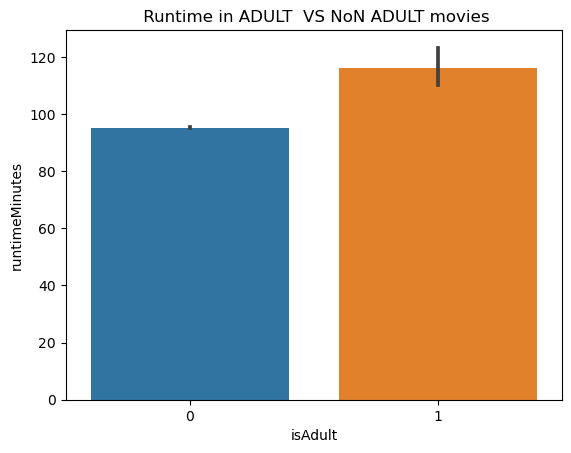

In [374]:
ax = sns.barplot(data=df, x='isAdult',y='runtimeMinutes');
ax.set_title(" Runtime in ADULT  VS NoN ADULT movies")

The graph here cleary indicate that the runtime is different

In [375]:
# Filtering out those who smoke and those who dont 
Adult_df = df.loc[df['isAdult']== 1].copy()
non_Adult_df = df.loc[df['isAdult']== 0].copy()

In [376]:
#Define our feature of interest
Adult = Adult_df['runtimeMinutes']
non_Adult = non_Adult_df['runtimeMinutes']

In [377]:
Adult_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
98,tt0137698,movie,The Girl from China,The Girl from China,1,2000,NaN,73,Adult
109,tt0139297,movie,Gwen's Tit Torment,Gwen's Tit Torment,1,2002,NaN,58,Adult
137,tt0147447,movie,Rocco's Cocktales 6,Sex Animals,1,2000,NaN,78,Adult
150,tt0152772,movie,Swing Set,Swing Set,1,2002,NaN,73,Adult
154,tt0153516,movie,Venus Delights,Venus Delights,1,2003,NaN,52,Adult


In [378]:
# Check for outliers in charges for smoker group
zscores= stats.zscore(Adult)
outliers = abs(zscores)>3
np.sum(outliers)


2

In [379]:
# Check for outliers in charges for non-smoker group
zscores= stats.zscore(non_Adult)
outliers = abs(zscores)>3
np.sum(outliers)


636

Need to remove outliers

In [380]:
# remove outliers from non-smoker group

# initialize the variable
i = 6


# while loop from i = 1 to 5
while i > 0:
    non_Adult = non_Adult[(np.abs(stats.zscore(non_Adult)) < 3)]
    i = i - 1

In [381]:
 Adult = Adult[(np.abs(stats.zscore(Adult)) < 3)]

#### Check for Normality

In [382]:
# test the smoker group for normality
result_adult_runtime = stats.normaltest(non_Adult)
result_adult_runtime

NormaltestResult(statistic=863.480993703588, pvalue=3.144014954533401e-188)

In [383]:
# test the non - smoker group for normality
result_no_smoker_charge = stats.normaltest(Adult)
result_no_smoker_charge


NormaltestResult(statistic=106.60811078557379, pvalue=7.085049353768666e-24)

In [384]:
# Test for equal variance
result = stats.levene(Adult, non_Adult)
result

LeveneResult(statistic=730.7218544714915, pvalue=2.766752747246273e-160)

In [ ]:
P value  is smaller alpha value so we are rejecting Null hypothesis and accept the alternate hypothesis 